# Plot IFN data from polymerase assay on full-length template
Load packages and define functions.

In [1]:
# install R packages
r_packages <- c(
  "ggplot2", "cowplot", "dplyr", "magrittr", "viridis",
  "IRdisplay", "tidyverse", "stringr", "scales")
suppressMessages(invisible(
  lapply(r_packages, library, character.only=TRUE)))

# http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/#a-colorblind-friendly-palette
# The palette with grey:
cbPalette <- c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", 
               "#0072B2", "#D55E00", "#CC79A7")

saveShowPlot <- function(p, width, height, plotname=NA) {
  if (is.na(plotname))
    plotname <- gsub("\\.", "_", deparse(substitute(p))) 
  pngfile <- sprintf("%s.png", plotname)
  pdffile <- sprintf("%s.pdf", plotname)
  ggsave(pngfile, plot=p, width=width, height=height, units="in")
  ggsave(pdffile, plot=p, width=width, height=height, units="in")
  display_png(file=pngfile, width=90 * width)
}

Read data from AJ te Velthuis:

In [2]:
ifn_data <- read.csv("IFNdata.csv")

samples <- ifn_data %>% distinct(sample) %$% sample
  
ifn_data <- ifn_data %>%
  transform(sample=factor(sample, samples, ordered=TRUE)) %>%
  mutate(mut_type=ifelse(sample == "Wildtype", "wildtype",
                  ifelse(sample == "PB1a", "negative control",
                  "mutant"))
         )

Plot data:

Warning message:
“Removed 4 rows containing missing values (geom_point).”Warning message:
“Removed 4 rows containing missing values (geom_point).”

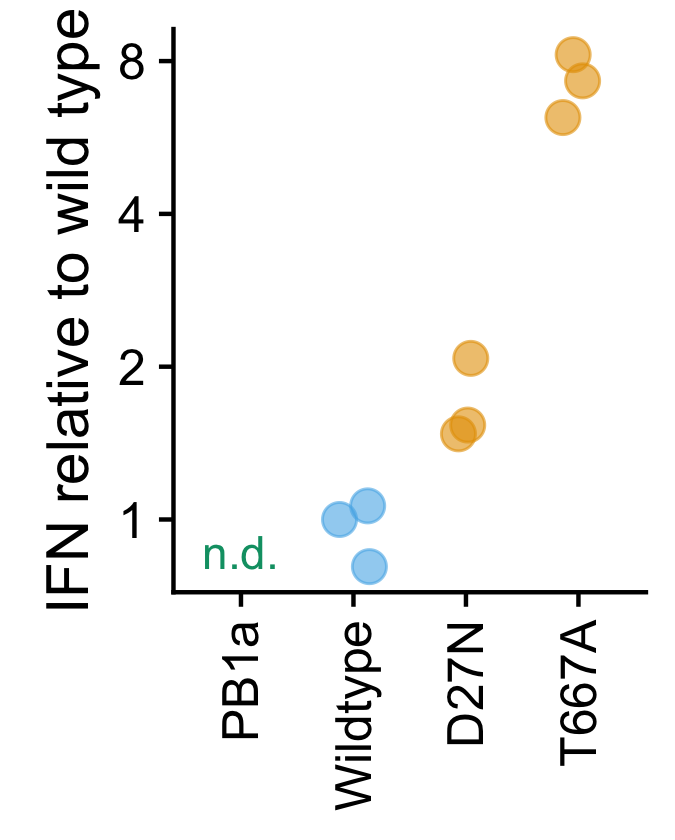

In [3]:
# prep data for plotting
ifn_data <- ifn_data %>% 
  filter(measurement == "IFN") %>%
  mutate(value=ifelse(value == 0, NA, value)) %>%
  group_by(sample) %>%
  mutate(all_na=all(is.na(value))) %>%
  ungroup %>%
  mutate(textlabel=ifelse(all_na, 'n.d.', ''))

# plot
ifn_plot <- ifn_data %>%
  ggplot(aes(sample, value, color=mut_type)) +
  geom_jitter(height=0, width=0.15, size=3.5, alpha=0.6) +
  geom_text(data=ifn_data %>% 
                   group_by(sample) %>% 
                   summarize(textlabel=first(textlabel),
                             mut_type=first(mut_type)),
            aes(sample, y=1, label=textlabel),
            hjust=0.5, vjust=1.5
            ) +
  theme(axis.text.x=element_text(angle=90, vjust=0.5, hjust=1, size=12),
        legend.position='none',
        axis.title.x=element_blank()
        ) +
  scale_color_manual(values=c(cbPalette[2], cbPalette[4], cbPalette[3])) +
  scale_y_continuous(trans=log2_trans()) +
  ylab("IFN relative to wild type")

saveShowPlot(ifn_plot, height=2.8, width=2.25)